#INTEGRANTES:
	

*   CRUEL GALLO OSWALDO ABRAHAM
*   RIOFRIO VELASQUEZ JOSE MIGUEL
*   RONQUILLO HOLGUIN ANGELICA SUANETH
* 	SANCHEZ MACIAS MADELINE NATHALY




#Objetivo 4: Garantizar una educación inclusiva, equitativa y de calidad para promover oportunidades de aprendizaje para todos

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

import matplotlib.cm as cm
from sklearn.metrics import silhouette_samples, silhouette_score

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Ciencia de datos/Tarea/educacion_datos.csv")

In [ ]:
df.sample(4)

,Country Name,Year,Adolescentes que no asisten a la escuela (% de adolescentes en edad de asistir al ciclo inferior de la escuela secundaria),"Adolescentes que no asisten a la escuela, mujeres (% de mujeres en edad de asistir al ciclo inferior de la escuela secundaria)","Adolescentes que no asisten a la escuela, varones (% de varones en edad de asistir al ciclo inferior de la escuela secundaria)","Alumnos de mayor edad, nivel primario, (% de matrícula)","Alumnos de mayor edad, nivel primario, mujeres (% de matrícula de mujeres)","Alumnos de mayor edad, nivel primario, varones (% de matrícula de varones)","Desempleo, mujeres (% de la población activa femenina) (estimación modelado OIT)","Desempleo, total (% de la población activa total) (estimación modelado OIT)",...,"Tasa de finalización del ciclo inferior de la educación secundaria, varones (% del grupo etario pertinente)",Tasa de matriculación neta ajustada,Tasa neta de ingreso en primer grado (% de población oficial en edad escolar),"Tasa neta de ingreso en primer grado, mujeres (% de población en edad escolar oficial)","Tasa neta de ingreso en primer grado, varones (% de población en edad escolar oficial)","Total de inscripciones, nivel primario, mujeres (% neto)","Total de inscripciones, nivel primario, varones (% neto)",Transición a la escuela secundaria (%),"Transición a la escuela secundaria, mujeres (%)","Transición a la escuela secundaria, varones (%)"
294,China,2015,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,4.016000,4.630000,...,0.000000,0.00000,76.77472,77.08119,76.51212,0.00000,0.00000,0.0,0.0,0.0
971,Mundo,2020,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,6.463784,6.578184,...,76.985939,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.0,0.0,0.0
101,Asia meridional,2020,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,5.978134,7.245832,...,78.524246,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.0,0.0,0.0
1033,Nueva Zelandia,2016,2.29272,2.36283,2.22576,0.35882,0.34273,0.37407,5.523000,5.150000,...,0.000000,98.52583,95.04605,95.93410,94.21156,98.92269,98.15234,0.0,0.0,0.0


#Indicadores 

In [ ]:
df_indicad = df [['Country Name', 'Year',
       'Proporción de niñas con respecto a niños en educación primaria y secundaria (%)',
       'Proporción de inscripciones de mujeres con respecto a varones en la educación primaria (%)',
       'Tasa de finalización de la educación de nivel primario, total (% del grupo etario correspondiente)',
       'Tasa de finalización de la educación de nivel primario, mujeres (% del grupo etario correspondiente)',
       'Tasa de finalización de la educación de nivel primario, varones (% del grupo etario correspondiente)']]
df_indicad.head(5)

,Country Name,Year,Proporción de niñas con respecto a niños en educación primaria y secundaria (%),Proporción de inscripciones de mujeres con respecto a varones en la educación primaria (%),"Tasa de finalización de la educación de nivel primario, total (% del grupo etario correspondiente)","Tasa de finalización de la educación de nivel primario, mujeres (% del grupo etario correspondiente)","Tasa de finalización de la educación de nivel primario, varones (% del grupo etario correspondiente)"
0,Ingreso mediano,2015,1.00935,1.01427,91.274353,91.337463,91.216507
1,Ingreso mediano,2016,1.01664,1.02509,92.075562,92.291100,91.876823
2,Ingreso mediano,2017,1.01483,1.02266,91.900169,92.051437,91.760162
3,Ingreso mediano,2018,1.00013,0.99267,92.166580,92.213150,92.123810
4,Ingreso mediano,2019,1.00152,0.99343,92.409363,92.526070,92.302292


In [ ]:
df_indicad.shape

(1578, 7)

In [ ]:
df_indicad.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1578 entries, 0 to 1577
Data columns (total 7 columns):
 #   Column                                                                                                Non-Null Count  Dtype  
---  ------                                                                                                --------------  -----  
 0   Country Name                                                                                          1578 non-null   object 
 1   Year                                                                                                  1578 non-null   int64  
 2   Proporción de niñas con respecto a niños en educación primaria y secundaria (%)                       1578 non-null   float64
 3   Proporción de inscripciones de mujeres con respecto a varones en la educación primaria (%)            1578 non-null   float64
 4   Tasa de finalización de la educación de nivel primario, total (% del grupo etario correspondiente)    1

#Analisis Exploratorio

###Proporción de niñas con respecto a niños en educación primaria y secundaria (%)

Se puede visualizar la cantidad de niñas que estudiaron en primaria y secundaria desde el 2015 al 2020. No muestran un cambio exuberante sin embargo, se puede ver una pequeña disminución en aquella cantidad sobre todo en el 2020.


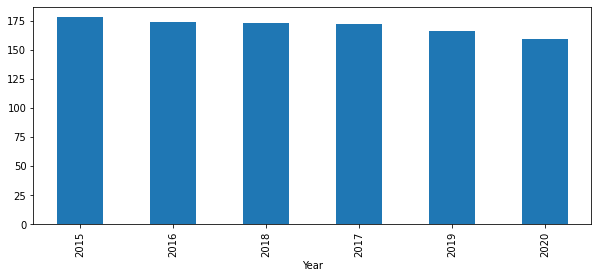

In [ ]:
df_taza= df_indicad.groupby(['Year'])['Proporción de niñas con respecto a niños en educación primaria y secundaria (%)'].sum().sort_values(ascending =False).plot.bar(figsize=(10,4))

###Proporción de inscripciones de mujeres con respecto a varones en la educación primaria (%)   

Se presenta 6 años que describen la Proporción de inscripciones de mujeres con respecto a varones en la educación primaria (%). Siendo el año con más evolución el 2020. 

Año 2015 (Año más Bajo)
* Q1 aproximadamente 1.5
* Q2 Mediana  1.3
* Q3 esta en  1.0

Año 2020 (Año más Alto)
* Q1 Aproximadamente 0.0
* Q2 Medio 1.1
* Q3 Está en 1.0

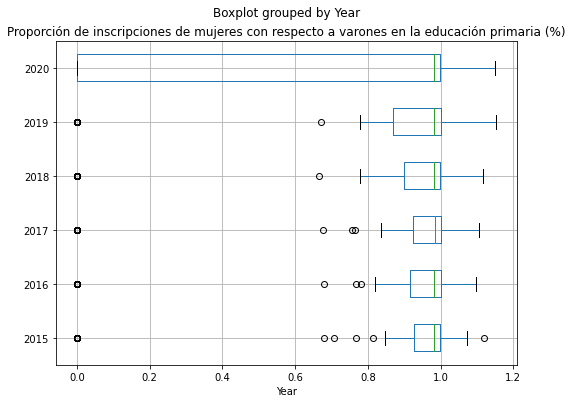

In [ ]:
df_indicad.boxplot(vert=False,by='Year', column= 'Proporción de inscripciones de mujeres con respecto a varones en la educación primaria (%)', figsize=(8,6))

Está filtrando los datos para incluir solo las filas en las que el valor de la columna 
"Proporción de inscripciones de mujeres con respecto a varones en la educación primaria (%)" es menor o igual a 1.
Destacando su punto máximo de 1.0 con una frecuencia de 800.

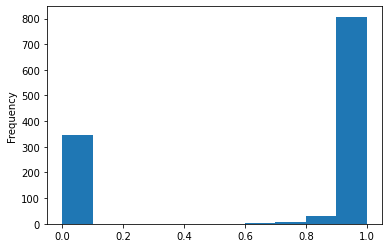

In [ ]:
df_indicad[df_indicad['Proporción de inscripciones de mujeres con respecto a varones en la educación primaria (%)']<=1]['Proporción de inscripciones de mujeres con respecto a varones en la educación primaria (%)'].plot.hist()

###Tasa de finalización de la educación de nivel primario

**Total de estudiantes que finalizaron primaria desde 2015 hasta 2020**

2016 es el año que hubieron más personas inscritas en el aria edudtiva.

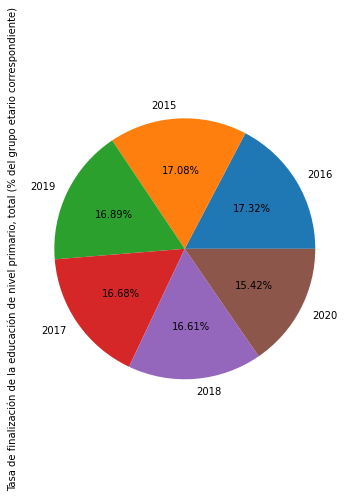

In [ ]:
df_indicad.groupby(['Year'])['Tasa de finalización de la educación de nivel primario, total (% del grupo etario correspondiente)'].sum().sort_values(ascending =False).plot.pie(autopct='%.2f%%',figsize=(6,6))

**Cantidad de estudiantes femeninos que finalizaron primaria desde 2015 hasta 2020**

En el año 2016 es cuando huvieron más inscripciones del genero femenino.

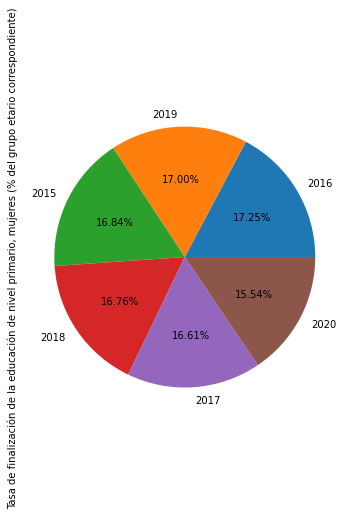

In [ ]:
df_indicad.groupby(['Year'])['Tasa de finalización de la educación de nivel primario, mujeres (% del grupo etario correspondiente)'].sum().sort_values(ascending =False).plot.pie(autopct='%.2f%%',figsize=(6,6))

**Cantidad de estudiantes masculinos que finalizaron primaria desde 2015 hasta 2020**

2020 es el año que menos inscritos huvieron, es por esto que se disminuyo el numero de estudiantes masculinos.

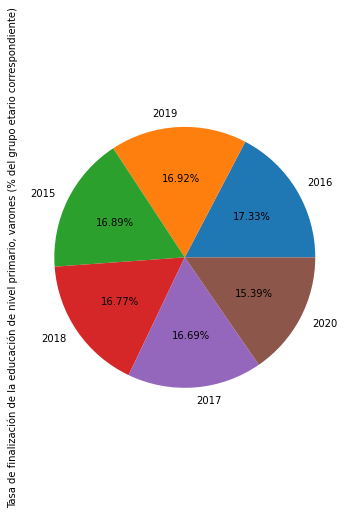

In [ ]:
df_indicad.groupby(['Year'])['Tasa de finalización de la educación de nivel primario, varones (% del grupo etario correspondiente)'].sum().sort_values(ascending =False).plot.pie(autopct='%.2f%%',figsize=(6,6))

#Análisis correlacional.

In [ ]:
df_indicad.corr().round(2)

,Year,Proporción de niñas con respecto a niños en educación primaria y secundaria (%),Proporción de inscripciones de mujeres con respecto a varones en la educación primaria (%),"Tasa de finalización de la educación de nivel primario, total (% del grupo etario correspondiente)","Tasa de finalización de la educación de nivel primario, mujeres (% del grupo etario correspondiente)","Tasa de finalización de la educación de nivel primario, varones (% del grupo etario correspondiente)"
Year,1.00,-0.05,-0.07,-0.04,-0.03,-0.03
Proporción de niñas con respecto a niños en educación primaria y secundaria (%),-0.05,1.00,0.73,0.59,0.59,0.59
Proporción de inscripciones de mujeres con respecto a varones en la educación primaria (%),-0.07,0.73,1.00,0.70,0.70,0.69
"Tasa de finalización de la educación de nivel primario, total (% del grupo etario correspondiente)",-0.04,0.59,0.70,1.00,0.98,0.99
"Tasa de finalización de la educación de nivel primario, mujeres (% del grupo etario correspondiente)",-0.03,0.59,0.70,0.98,1.00,0.99
"Tasa de finalización de la educación de nivel primario, varones (% del grupo etario correspondiente)",-0.03,0.59,0.69,0.99,0.99,1.00


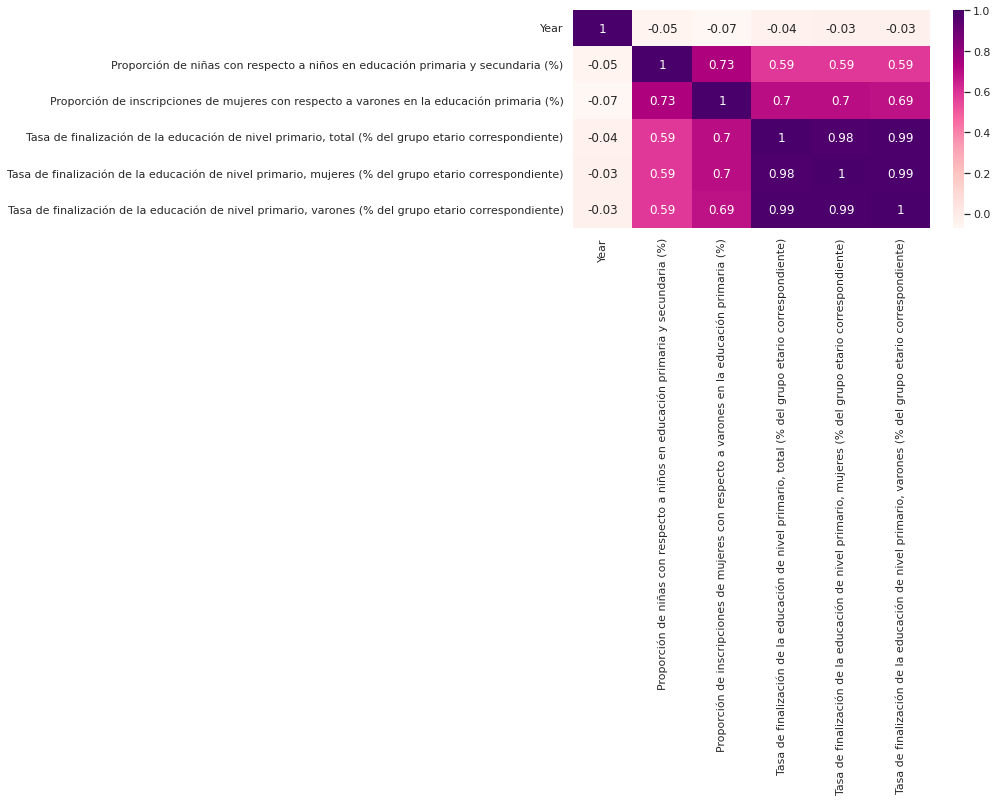

In [ ]:
mcor = df_indicad.corr().round(2)
sns.set(rc={ 'figure.figsize':(8,4)})
mcplot = sns.heatmap(mcor, cmap="RdPu", annot=True)

Se puede observar que las variables escogidas poseen mucha relacion entre si.

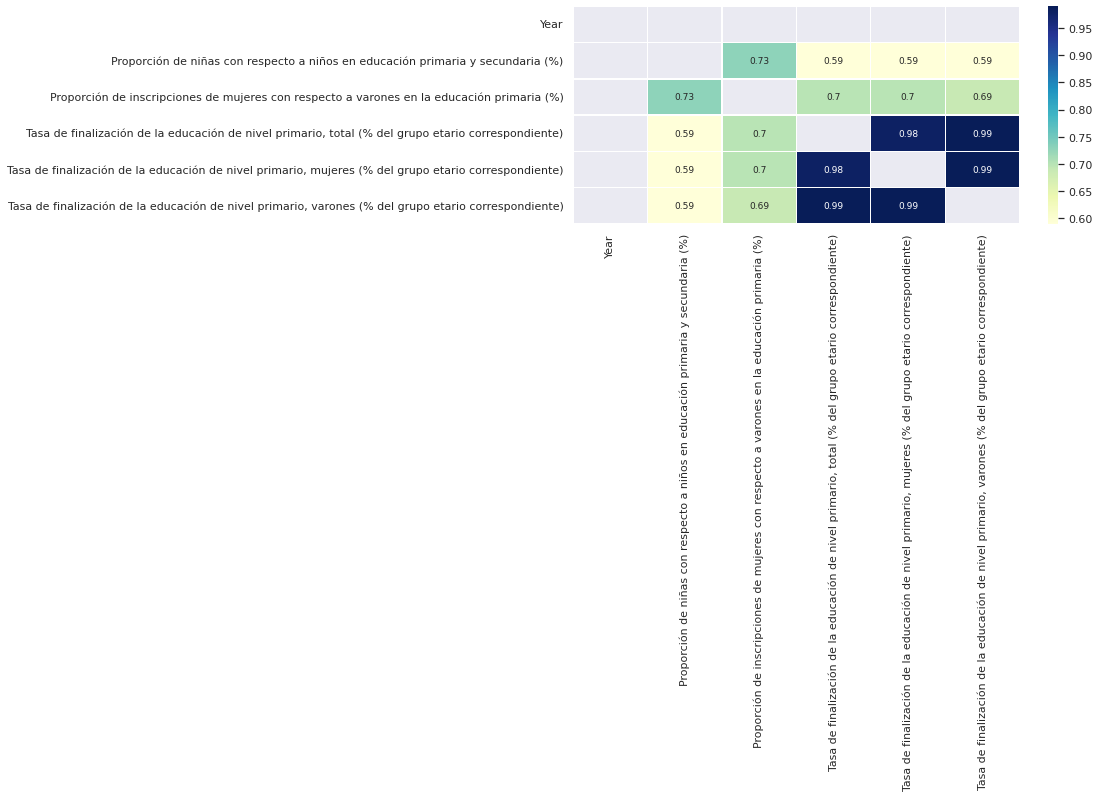

In [ ]:
cor = df_indicad.corr().round(2)
mcor = mcor[((mcor >= .5) | (mcor<= - .5)) & (mcor!=1.0)]
sns.set(rc={'figure.figsize':(10,4)})
mcplot = sns.heatmap(mcor, cmap="YlGnBu",annot=True,linewidths=0.4, annot_kws={"size":9})

#Escoger variables


In [ ]:
df_1 = df_indicad [[ 'Year',
       'Proporción de niñas con respecto a niños en educación primaria y secundaria (%)', 
       'Tasa de finalización de la educación de nivel primario, mujeres (% del grupo etario correspondiente)']]
df_1.head(5)

,Year,Proporción de niñas con respecto a niños en educación primaria y secundaria (%),"Tasa de finalización de la educación de nivel primario, mujeres (% del grupo etario correspondiente)"
0,2015,1.00935,91.337463
1,2016,1.01664,92.291100
2,2017,1.01483,92.051437
3,2018,1.00013,92.213150
4,2019,1.00152,92.526070


In [ ]:
## Ajustar variables
sc_dfa = StandardScaler()
dfa_std = sc_dfa.fit_transform(df_1.astype(float))
dfa_std

array([[-1.46385011,  0.76457314,  0.67595015],
       [-0.87831007,  0.78000869,  0.69723018],
       [-0.29277002,  0.77617637,  0.69188221],
       ...,
       [ 0.29277002,  0.61532075,  0.16355528],
       [ 0.87831007,  0.61597714,  0.17189653],
       [ 1.46385011,  0.6196825 ,  0.18568075]])

#Determinar k

###Análisis codo

In [ ]:
df_1.describe()

,Year,Proporción de niñas con respecto a niños en educación primaria y secundaria (%),"Tasa de finalización de la educación de nivel primario, mujeres (% del grupo etario correspondiente)"
count,1578.000000,1578.000000,1578.000000
mean,2017.500000,0.648252,61.045655
std,1.708367,0.472437,44.827878
min,2015.000000,0.000000,0.000000
25%,2016.000000,0.000000,0.000000
50%,2017.500000,0.979155,87.836372
75%,2019.000000,1.006490,98.554745
max,2020.000000,1.153880,133.333328


In [ ]:
df_acodo=(df_1-df_1.min())/(df_1.max()-df_1.min())
df_acodo

,Year,Proporción de niñas con respecto a niños en educación primaria y secundaria (%),"Tasa de finalización de la educación de nivel primario, mujeres (% del grupo etario correspondiente)"
0,0.0,0.874744,0.685031
1,0.2,0.881062,0.692183
2,0.4,0.879494,0.690386
3,0.6,0.866754,0.691599
4,0.8,0.867959,0.693946
...,...,...,...
1573,0.2,0.807190,0.500994
1574,0.4,0.811046,0.505779
1575,0.6,0.813655,0.512814
1576,0.8,0.813923,0.515617


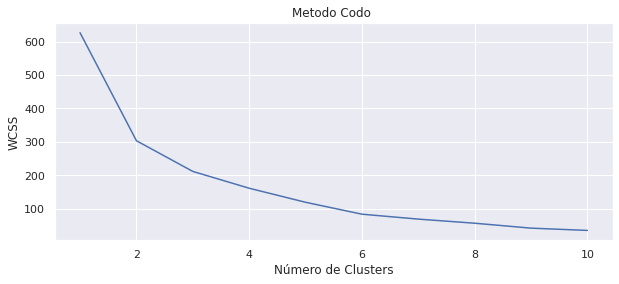

In [ ]:
wcss=[]

for i in range(1,11):
	kmeans = KMeans(n_clusters=i, max_iter=300)
	kmeans.fit(df_acodo)
	wcss.append(kmeans.inertia_)
plt.plot(range(1,11), wcss)
plt.xlabel("Número de Clusters")
plt.ylabel("WCSS")
plt.title("Metodo Codo ")
plt.show()

#Silueta

In [ ]:
for k in range(2, 6):
    Kmeans = KMeans(n_clusters=k)
    kmeans.fit(df_1)
    labels = kmeans.labels_
    silhouette = silhouette_score(df_1, labels)
    print("k =", k,"-> Silhouette puntaje =", silhouette)
df_1["cluster"] = kmeans.labels_

k = 2 -> Silhouette puntaje = 0.6848439236448324
k = 3 -> Silhouette puntaje = 0.6848439236448324
k = 4 -> Silhouette puntaje = 0.6848439236448324
k = 5 -> Silhouette puntaje = 0.6848439236448324


<ipython-input-23-c63c83fc037f>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1["cluster"] = kmeans.labels_


Al haber realizado las 2 tecnicas para encontrar el k adecuado pudimos observar que el k=2

#Modelo K-Means con el K adecuado.

In [ ]:
df_1 = df_indicad [[ 'Year',
       'Proporción de niñas con respecto a niños en educación primaria y secundaria (%)', 
       'Tasa de finalización de la educación de nivel primario, mujeres (% del grupo etario correspondiente)']]

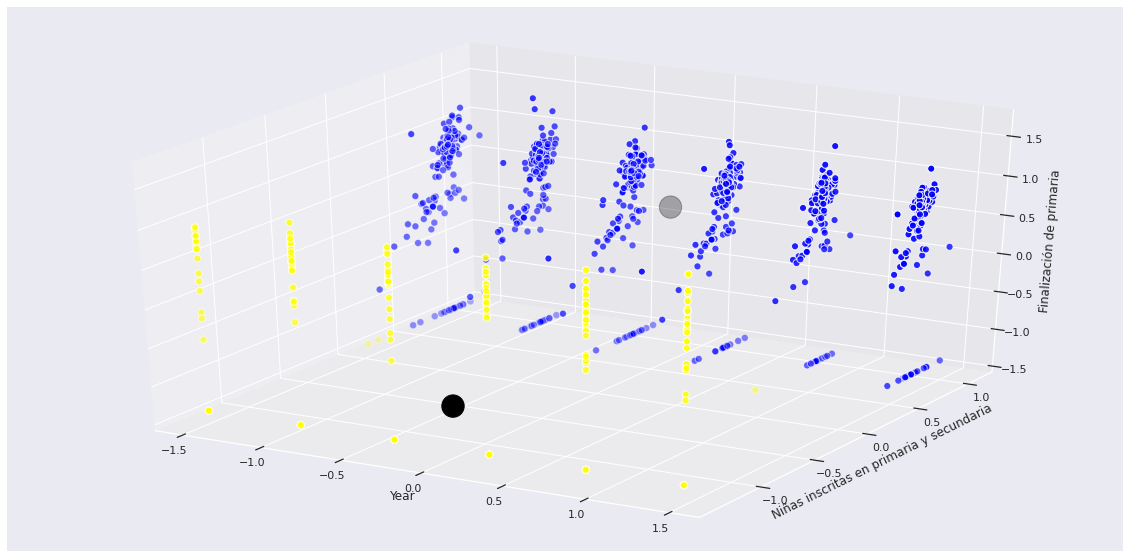

In [ ]:
kmeans = KMeans(n_clusters=2, random_state=42).fit(dfa_std)
labels = kmeans.labels_


new_dfa = pd.DataFrame(data = dfa_std, columns = ['Year', 
       'Proporción de niñas con respecto a niños en educación primaria y secundaria (%)', 'Tasa de finalización de la educación de nivel primario, mujeres (% del grupo etario correspondiente)'])
new_dfa['label_kmeans'] = labels
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(new_dfa.Year[new_dfa.label_kmeans == 0], new_dfa["Proporción de niñas con respecto a niños en educación primaria y secundaria (%)"][new_dfa.label_kmeans == 0], new_dfa["Tasa de finalización de la educación de nivel primario, mujeres (% del grupo etario correspondiente)"][new_dfa.label_kmeans == 0], c='blue', s=50, edgecolor='white',linestyle='-')
ax.scatter(new_dfa.Year[new_dfa.label_kmeans == 1], new_dfa["Proporción de niñas con respecto a niños en educación primaria y secundaria (%)"][new_dfa.label_kmeans == 1], new_dfa["Tasa de finalización de la educación de nivel primario, mujeres (% del grupo etario correspondiente)"][new_dfa.label_kmeans == 1], c='yellow', s=50, edgecolor='white',linestyle='-')

centers = kmeans.cluster_centers_
ax.scatter(centers[:, 0], centers[:, 1], centers[:, 2],c='black', s=500)
plt.xlabel("Year")
plt.ylabel("Niñas inscritas en primaria y secundaria")
ax.set_zlabel('Finalización de primaria')
plt.show()

Se visualizan dos clúster, en cual representan, Finalización de primaria donde existe más dispersión en varios conjuntos.

El indicador de Niñas inscritas en primaria y secundaria tambien existe dispersión pero en poca cantidad. Se aprecia que va en aumento al pasar de los años.

#Asignar clusters de K-means al dataset original

In [ ]:
df_1asignado = df_indicad
df_1asignado["cluster"] = kmeans.labels_
df_1asignado.sample(5)

<ipython-input-26-2bbf71e4253f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1asignado["cluster"] = kmeans.labels_


,Country Name,Year,Proporción de niñas con respecto a niños en educación primaria y secundaria (%),Proporción de inscripciones de mujeres con respecto a varones en la educación primaria (%),"Tasa de finalización de la educación de nivel primario, total (% del grupo etario correspondiente)","Tasa de finalización de la educación de nivel primario, mujeres (% del grupo etario correspondiente)","Tasa de finalización de la educación de nivel primario, varones (% del grupo etario correspondiente)",cluster
458,Estonia,2017,1.01177,1.00048,97.231438,97.425163,97.048019,0
933,Mauritania,2018,1.04680,1.05809,76.056023,79.691109,72.518913,0
1189,República Centroafricana,2016,0.76095,0.78010,40.874168,32.834202,48.877022,0
1494,Viet Nam,2015,0.00000,1.00418,105.164459,105.551552,104.804871,1
1161,Portugal,2018,0.98605,0.97412,99.570190,99.453842,99.681602,0


#Describir los clusters usando boxplots y scatters

In [ ]:
df_1asignado.head(4)

,Country Name,Year,Proporción de niñas con respecto a niños en educación primaria y secundaria (%),Proporción de inscripciones de mujeres con respecto a varones en la educación primaria (%),"Tasa de finalización de la educación de nivel primario, total (% del grupo etario correspondiente)","Tasa de finalización de la educación de nivel primario, mujeres (% del grupo etario correspondiente)","Tasa de finalización de la educación de nivel primario, varones (% del grupo etario correspondiente)",cluster
0,Ingreso mediano,2015,1.00935,1.01427,91.274353,91.337463,91.216507,0
1,Ingreso mediano,2016,1.01664,1.02509,92.075562,92.291100,91.876823,0
2,Ingreso mediano,2017,1.01483,1.02266,91.900169,92.051437,91.760162,0
3,Ingreso mediano,2018,1.00013,0.99267,92.166580,92.213150,92.123810,0


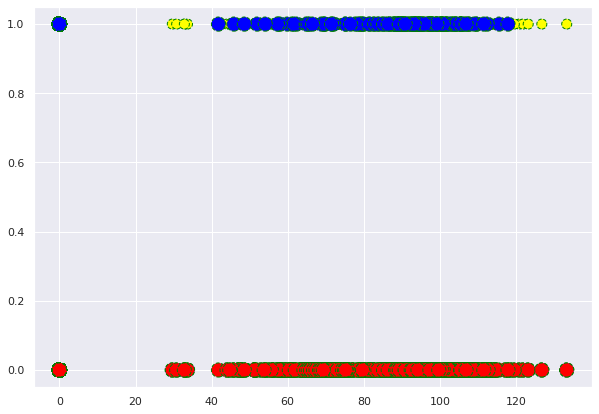

In [ ]:
fig, ax = plt.subplots(figsize=(10,7) )
plt.scatter( df_1asignado["Tasa de finalización de la educación de nivel primario, mujeres (% del grupo etario correspondiente)"],[df_1asignado["cluster"]== 0], 
            color = "yellow", s=100, edgecolor='green',linestyle='--')
plt.scatter( df_1asignado["Tasa de finalización de la educación de nivel primario, mujeres (% del grupo etario correspondiente)"],[df_1asignado["cluster"] == 1], 
            color = "blue", s=200, edgecolor='green',linestyle='--')
plt.scatter(df_1asignado["Tasa de finalización de la educación de nivel primario, mujeres (% del grupo etario correspondiente)"],[df_1asignado["cluster"] == 2], 
            color = "red", s=200, edgecolor='green',linestyle='--')



Los tres clusters principales Tasa de finalización de la educación de nivel primario, mujeres (% del grupo etario correspondiente).

 * Representados por el clusters azul, rojo y amarillo.
 * Cluster Rojo es el más bajo pero del 25 al 130 se visualiza más grupos de dispersión.
 * Cluster azul es el alto 40 al 115 existe dispersión en el conjunto de datos.

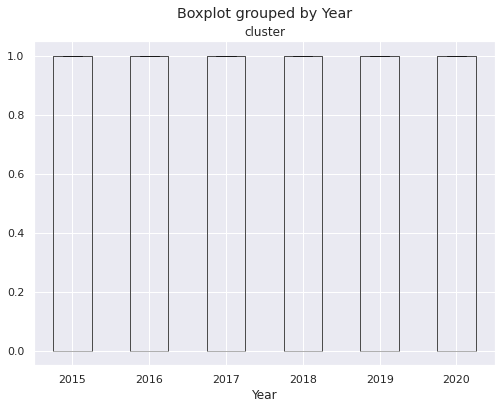

In [ ]:
df_1asignado.boxplot(vert=True,by='Year', column= 'cluster', figsize=(8,6))

No hay un Q3 en el boxplot de cada cluster por año. Pero destaca que Q1 es 0.0 y Q3 1.0

#Otras variables y los 3 métodos

In [ ]:
df_indicad.columns

Index(['Country Name', 'Year',
       'Proporción de niñas con respecto a niños en educación primaria y secundaria (%)',
       'Proporción de inscripciones de mujeres con respecto a varones en la educación primaria (%)',
       'Tasa de finalización de la educación de nivel primario, total (% del grupo etario correspondiente)',
       'Tasa de finalización de la educación de nivel primario, mujeres (% del grupo etario correspondiente)',
       'Tasa de finalización de la educación de nivel primario, varones (% del grupo etario correspondiente)',
       'cluster'],
      dtype='object')

In [ ]:
df_2 = df_indicad [[ 'Proporción de inscripciones de mujeres con respecto a varones en la educación primaria (%)','Tasa de finalización de la educación de nivel primario, total (% del grupo etario correspondiente)']]
df_2.sample(5)

,Proporción de inscripciones de mujeres con respecto a varones en la educación primaria (%),"Tasa de finalización de la educación de nivel primario, total (% del grupo etario correspondiente)"
94,0.00000,0.000000
136,0.99331,99.408501
1425,0.00000,0.000000
1500,0.00000,0.000000
1298,1.00096,99.033867


In [ ]:
## Ajustar variables
sc_dfa = StandardScaler()
dfa_std2 = sc_dfa.fit_transform(df_2.astype(float))
dfa_std2

array([[0.59975265, 0.66599921],
       [0.62617781, 0.68402114],
       [0.62024325, 0.68007597],
       ...,
       [0.4607158 , 0.19109448],
       [0.46098437, 0.20021441],
       [0.46157058, 0.21505998]])

#Determinar el mejor K

In [ ]:
df_acodo2=(df_2-df_2.min())/(df_2.max()-df_2.min())
df_acodo2

,Proporción de inscripciones de mujeres con respecto a varones en la educación primaria (%),"Tasa de finalización de la educación de nivel primario, total (% del grupo etario correspondiente)"
0,0.880175,0.696652
1,0.889565,0.702768
2,0.887456,0.701429
3,0.861431,0.703462
4,0.862091,0.705315
...,...,...
1573,0.827908,0.524341
1574,0.829809,0.528510
1575,0.830772,0.535507
1576,0.830867,0.538601


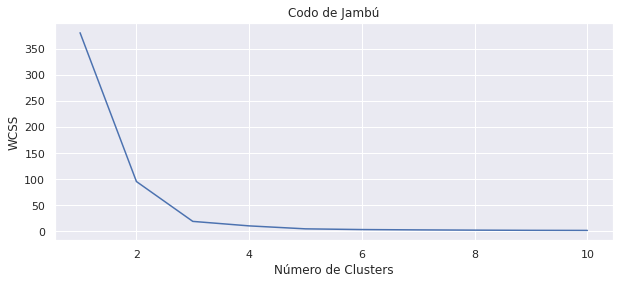

In [ ]:
wcss=[]

for i in range(1,11):
	kmeans = KMeans(n_clusters=i, max_iter=300)
	kmeans.fit(df_acodo2)
	wcss.append(kmeans.inertia_)
plt.plot(range(1,11), wcss)
plt.xlabel("Número de Clusters")
plt.ylabel("WCSS")
plt.title("Codo de Jambú")
plt.show()

Se puede visualizar claramente que el K debe ser 3

###Metodo K-means

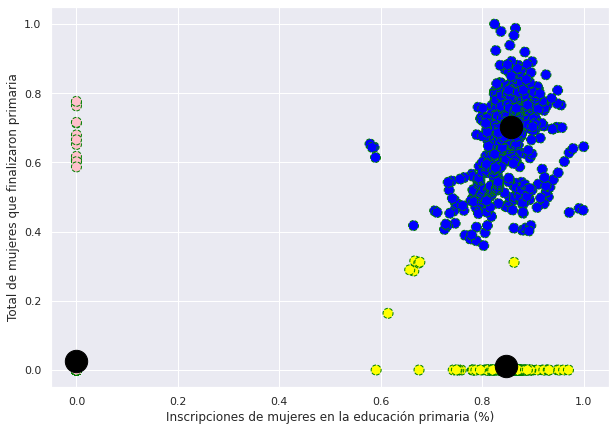

In [ ]:
n_clusters = 3
kmeans = KMeans(n_clusters=n_clusters, random_state=42).fit(df_acodo2)
labels = kmeans.labels_
new_dfa = pd.DataFrame(data = df_acodo2, columns = ['Proporción de inscripciones de mujeres con respecto a varones en la educación primaria (%)','Tasa de finalización de la educación de nivel primario, total (% del grupo etario correspondiente)'])
new_dfa['label_kmeans'] = labels
fig, ax = plt.subplots(figsize=(10,7) )
plt.scatter( new_dfa["Proporción de inscripciones de mujeres con respecto a varones en la educación primaria (%)"][new_dfa["label_kmeans"] == 0],new_dfa["Tasa de finalización de la educación de nivel primario, total (% del grupo etario correspondiente)"][new_dfa["label_kmeans"] == 0], 
            color = "blue", s=100, edgecolor='green',linestyle='--')
plt.scatter(new_dfa["Proporción de inscripciones de mujeres con respecto a varones en la educación primaria (%)"][new_dfa["label_kmeans"] == 1], new_dfa["Tasa de finalización de la educación de nivel primario, total (% del grupo etario correspondiente)"][new_dfa["label_kmeans"] == 1],
            color = "pink", s=100, edgecolor='green',linestyle='--')
plt.scatter(new_dfa["Proporción de inscripciones de mujeres con respecto a varones en la educación primaria (%)"][new_dfa["label_kmeans"] == 2], new_dfa["Tasa de finalización de la educación de nivel primario, total (% del grupo etario correspondiente)"][new_dfa["label_kmeans"] == 2], 
            color = "yellow", s=100, edgecolor='green',linestyle='--')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=500);
ax.set_xlabel('Inscripciones de mujeres en la educación primaria (%)')
ax.set_ylabel('Total de mujeres que finalizaron primaria')
plt.show()

###Jerárquico

In [ ]:
x= df_indicad.iloc[:,[3,4]].values
x.shape

(1578, 2)

In [ ]:
from sklearn.cluster import DBSCAN
dbs = DBSCAN(eps=3, min_samples=4,metric="euclidean")

In [ ]:
model_dbs = dbs.fit(x)
model_dbs.labels_


array([0, 0, 0, ..., 0, 0, 0])

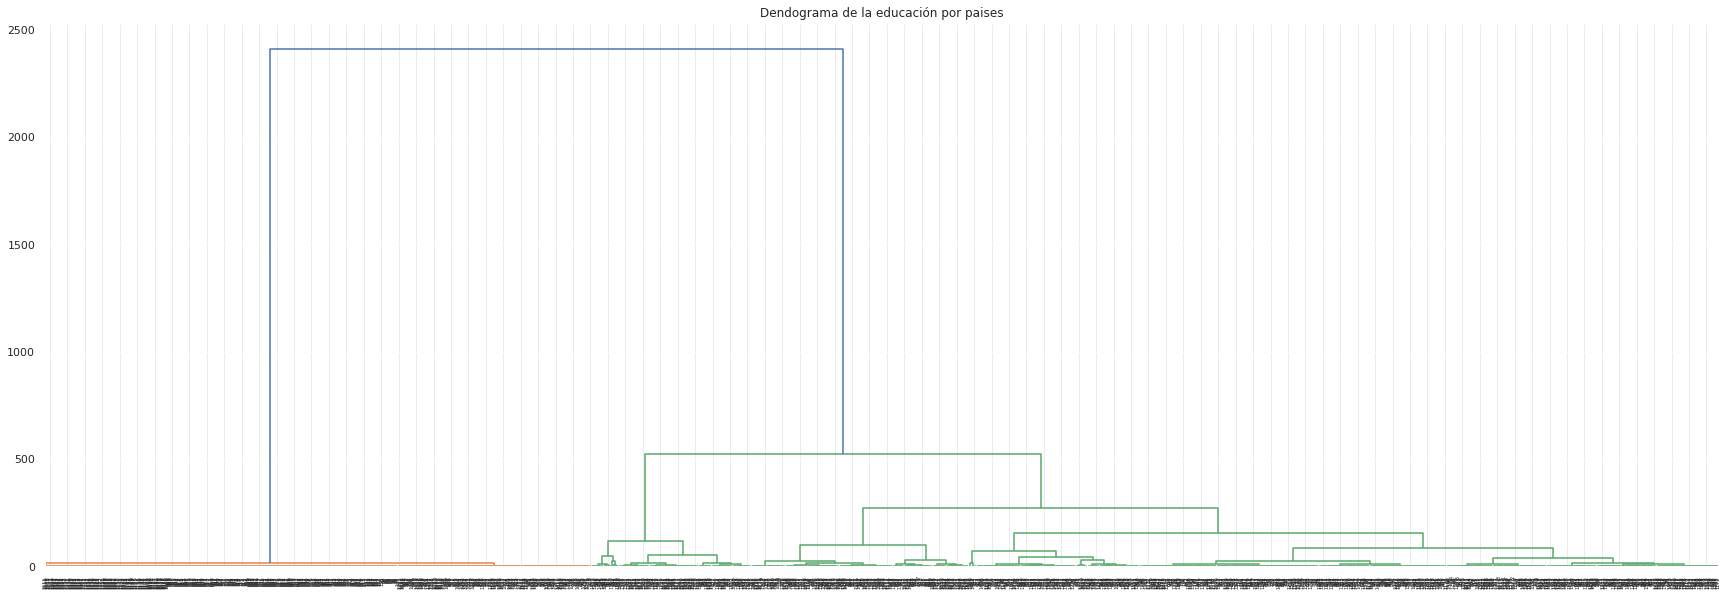

In [ ]:
from seaborn.matrix import dendrogram
import scipy.cluster.hierarchy as sch
fig, ax =plt.subplots(figsize=(30,10))
ax=dendrogram = sch.dendrogram(sch.linkage(x,method='ward'))
plt.title('Dendograma de la educación por paises')
plt.plot(12,30)


Se determina la jerarquía de los países, estos han tenido mayor índice de graduación por años y se señaló que países europeos y parte de Asia en el 2019 han tiendo mayores graduados mientras los demás países no han establecido jerarquía.

###Modelos de mezcla gaussiana

In [ ]:
df_2.columns

Index(['Proporción de inscripciones de mujeres con respecto a varones en la educación primaria (%)', 'Tasa de finalización de la educación de nivel primario, total (% del grupo etario correspondiente)'], dtype='object')

Means: [[ 0.99244264 97.09448095]
 [ 0.34745287  0.        ]
 [ 0.89290058 68.98448853]]
Covariances: [[[ 5.72548824e-04  4.73368431e-02]
  [ 4.73368431e-02  5.72265158e+01]]

 [[ 2.21748346e-01  0.00000000e+00]
  [ 0.00000000e+00  1.00000000e-06]]

 [[ 5.97531667e-02 -8.40122957e-01]
  [-8.40122957e-01  1.41593721e+02]]]


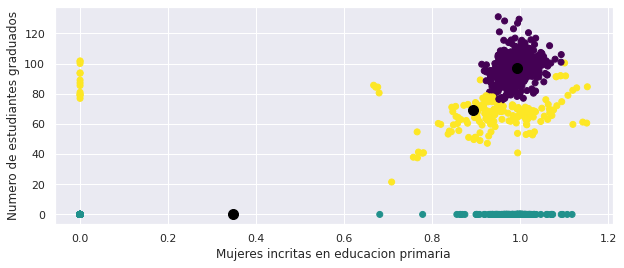

In [ ]:
from sklearn.mixture import GaussianMixture
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm

data=df_2[["Proporción de inscripciones de mujeres con respecto a varones en la educación primaria (%)",
           "Tasa de finalización de la educación de nivel primario, total (% del grupo etario correspondiente)"]]
gmm = GaussianMixture(n_components=3)
gmm.fit(data)
labels = gmm.predict(data)
print("Means:", gmm.means_)
print("Covariances:", gmm.covariances_)
plt.scatter(data["Proporción de inscripciones de mujeres con respecto a varones en la educación primaria (%)"], 
           data["Tasa de finalización de la educación de nivel primario, total (% del grupo etario correspondiente)"], 
           c=labels, cmap='viridis')
plt.scatter(gmm.means_[:, 0], gmm.means_[:, 1], c='black', s=100)
plt.xlabel('Mujeres incritas en educacion primaria')
plt.ylabel('Numero de estudiantes graduados')
plt.show()

En este gráfico muestra que existen un mayor número de mujeres que terminan la primara y a su ves con menos intensidad pero igual de alta numero de personas que terminaron su educacion primaria con éxito

In [ ]:
!jupyter nbconvert --to html 2_1_Proyecto_Grupo8.ipynb

[NbConvertApp] Converting notebook 2_1_Proyecto_Grupo8.ipynb to html
[NbConvertApp] Writing 1268090 bytes to 2_1_Proyecto_Grupo8.html
